Correlation between enrichment variables

In [22]:
import pandas as pd

# Load the dataset
file_path = 'demographic_NJ.csv'
data = pd.read_csv(file_path)

# Identify COVID-19 case columns (filter columns by 'cases' keyword)
covid_case_columns = [col for col in data.columns if 'cases' in col]

# Calculate a central measure of COVID-19 cases (e.g., median) across available dates for each county
data['median_cases'] = data[covid_case_columns].median(axis=1)

# Demographic columns for sex, age, and race as specified
# Sex columns
sex_columns = [
    'Estimate  SEX AND AGE  Total population  Male',
    'Estimate  SEX AND AGE  Total population  Female'
]

# Age columns
age_columns = [
    'Estimate  SEX AND AGE  Total population  Under 18 years',
    'Estimate  SEX AND AGE  Total population  16 years and over',
    'Estimate  SEX AND AGE  Total population  18 years and over',
    'Estimate  SEX AND AGE  Total population  21 years and over',
    'Estimate  SEX AND AGE  Total population  62 years and over',
    'Estimate  SEX AND AGE  Total population  65 years and over'
]

# Race columns (any column that contains 'Estimate  RACE  Total population  One race')
race_columns = [col for col in data.columns if 'Estimate  RACE  Total population  One race' in col]

# Filter data to keep only relevant columns: median cases, total population, sex, age, and race columns
selected_columns = ['County Name', 'population', 'median_cases'] + sex_columns + age_columns + race_columns
filtered_data = data[selected_columns].dropna()

# Normalize COVID-19 median cases by county population
filtered_data['cases_per_100k'] = (filtered_data['median_cases'] / filtered_data['population']) * 100000

# Perform correlation analysis between `cases_per_100k` and demographic columns
correlation_columns = ['cases_per_100k'] + sex_columns + age_columns + race_columns
correlation_results = filtered_data[correlation_columns].corr()['cases_per_100k'].sort_values(ascending=False)

# Grouped results
print("Correlation with Sex Demographics:")
print(correlation_results[sex_columns], "\n")

print("Correlation with Age Demographics:")
print(correlation_results[age_columns], "\n")

print("Correlation with Race Demographics:")
print(correlation_results[race_columns])


Correlation with Sex Demographics:
Estimate  SEX AND AGE  Total population  Male      0.586020
Estimate  SEX AND AGE  Total population  Female    0.579322
Name: cases_per_100k, dtype: float64 

Correlation with Age Demographics:
Estimate  SEX AND AGE  Total population  Under 18 years       0.613754
Estimate  SEX AND AGE  Total population  16 years and over    0.571118
Estimate  SEX AND AGE  Total population  18 years and over    0.572407
Estimate  SEX AND AGE  Total population  21 years and over    0.570288
Estimate  SEX AND AGE  Total population  62 years and over    0.446539
Estimate  SEX AND AGE  Total population  65 years and over    0.441061
Name: cases_per_100k, dtype: float64 

Correlation with Race Demographics:
Estimate  RACE  Total population  One race                                                                        0.568963
Estimate  RACE  Total population  One race.1                                                                      0.568963
Estimate  RACE  Total po

In [16]:
import pandas as pd

# Load the dataset
file_path = 'demographic_NJ.csv'
data = pd.read_csv(file_path)

# Define the relevant demographic columns based on sex, age, and race
sex_columns = [
    'Estimate  SEX AND AGE  Total population  Male', 
    'Estimate  SEX AND AGE  Total population  Female'
]

age_columns = [
    'Estimate  SEX AND AGE  Total population  Under 18 years',
    'Estimate  SEX AND AGE  Total population  16 years and over',
    'Estimate  SEX AND AGE  Total population  18 years and over',
    'Estimate  SEX AND AGE  Total population  21 years and over',
    'Estimate  SEX AND AGE  Total population  62 years and over',
    'Estimate  SEX AND AGE  Total population  65 years and over'
]

# Dynamically extract race columns that match 'Estimate  RACE  Total population  One race'
race_columns = [col for col in data.columns if "Estimate  RACE  Total population  One race" in col]

# Extract daily COVID-19 case columns
case_columns = [col for col in data.columns if '_cases' in col]

# Select relevant columns for analysis
relevant_columns = ['County Name', 'population'] + sex_columns + age_columns + race_columns + case_columns
subset_data = data[relevant_columns]

# Normalize demographic columns by the total population
for col in sex_columns + age_columns + race_columns:
    subset_data[col] = subset_data[col] / subset_data['population']

# Calculate the mean of COVID-19 cases for each county
subset_data['mean_covid_cases'] = subset_data[case_columns].mean(axis=1)

# Perform correlation analysis
demographic_columns = sex_columns + age_columns + race_columns
correlation_data = subset_data[demographic_columns + ['mean_covid_cases']]
correlation_matrix = correlation_data.corr()

# Extract correlations with 'mean_covid_cases'
correlations_with_cases = correlation_matrix['mean_covid_cases'].sort_values(ascending=False)

# Display correlations
print(correlations_with_cases)


mean_covid_cases                                                                                                  1.000000
Estimate  RACE  Total population  One race  Asian  Filipino                                                       0.697510
Estimate  RACE  Total population  One race  Some other race                                                       0.600857
Estimate  RACE  Total population  One race  Native Hawaiian and Other Pacific Islander  Native Hawaiian           0.581154
Estimate  RACE  Total population  One race  Asian                                                                 0.527199
Estimate  RACE  Total population  One race  Asian  Other Asian                                                    0.498782
Estimate  SEX AND AGE  Total population  Under 18 years                                                           0.475085
Estimate  RACE  Total population  One race  Asian  Japanese                                                       0.467095
Estimate  RACE  

/var/folders/08/_ggffc9j1_j4btnyv62h7zn40000gn/T/ipykernel_2589/493079703.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data[col] = subset_data[col] / subset_data['population']
/var/folders/08/_ggffc9j1_j4btnyv62h7zn40000gn/T/ipykernel_2589/493079703.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['mean_covid_cases'] = subset_data[case_columns].mean(axis=1)


In [15]:
import pandas as pd

# Load dataset
data = pd.read_csv('demographic_NJ.csv')

# Define columns for sex, age, and race-based demographics
sex_columns = [
    'Estimate  SEX AND AGE  Total population  Male', 
    'Estimate  SEX AND AGE  Total population  Female'
]

age_columns = [
    'Estimate  SEX AND AGE  Total population  Under 18 years',
    'Estimate  SEX AND AGE  Total population  16 years and over',
    'Estimate  SEX AND AGE  Total population  18 years and over',
    'Estimate  SEX AND AGE  Total population  21 years and over',
    'Estimate  SEX AND AGE  Total population  62 years and over',
    'Estimate  SEX AND AGE  Total population  65 years and over'
]

race_columns = [col for col in data.columns if "Estimate  RACE  Total population  One race" in col]
case_columns = [col for col in data.columns if '_cases' in col]

# Prepare subset with relevant columns
relevant_columns = ['County Name', 'population'] + sex_columns + age_columns + race_columns + case_columns
subset_data = data[relevant_columns]

# Normalize demographic data by county population
for col in sex_columns + age_columns + race_columns:
    subset_data[col] = subset_data[col] / subset_data['population']

# Calculate mean COVID-19 cases for each county
subset_data['mean_covid_cases'] = subset_data[case_columns].mean(axis=1)

# Perform correlation analysis
demographic_columns = sex_columns + age_columns + race_columns
correlation_data = subset_data[demographic_columns + ['mean_covid_cases']]
correlation_matrix = correlation_data.corr()

# Extract correlations with COVID-19 cases
correlations_with_cases = correlation_matrix['mean_covid_cases'].sort_values(ascending=False)

# Display correlations
print(correlations_with_cases)


mean_covid_cases                                                                                                  1.000000
Estimate  RACE  Total population  One race  Asian  Filipino                                                       0.697510
Estimate  RACE  Total population  One race  Some other race                                                       0.600857
Estimate  RACE  Total population  One race  Native Hawaiian and Other Pacific Islander  Native Hawaiian           0.581154
Estimate  RACE  Total population  One race  Asian                                                                 0.527199
Estimate  RACE  Total population  One race  Asian  Other Asian                                                    0.498782
Estimate  SEX AND AGE  Total population  Under 18 years                                                           0.475085
Estimate  RACE  Total population  One race  Asian  Japanese                                                       0.467095
Estimate  RACE  

/var/folders/08/_ggffc9j1_j4btnyv62h7zn40000gn/T/ipykernel_2589/2416306050.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data[col] = subset_data[col] / subset_data['population']
/var/folders/08/_ggffc9j1_j4btnyv62h7zn40000gn/T/ipykernel_2589/2416306050.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['mean_covid_cases'] = subset_data[case_columns].mean(axis=1)


In [14]:
import pandas as pd

# Load the dataset
data = pd.read_csv('demographic_NJ.csv')

# Calculate total COVID-19 cases across dates
case_columns = [col for col in data.columns if '_cases' in col]
data['Total_COVID_Cases'] = data[case_columns].sum(axis=1)

# Specify demographic columns of interest
sex_columns = [
    'Estimate  SEX AND AGE  Total population  Male', 
    'Estimate  SEX AND AGE  Total population  Female'
]
age_columns = [
    'Estimate  SEX AND AGE  Total population  Under 18 years',
    'Estimate  SEX AND AGE  Total population  16 years and over',
    'Estimate  SEX AND AGE  Total population  18 years and over',
    'Estimate  SEX AND AGE  Total population  21 years and over',
    'Estimate  SEX AND AGE  Total population  62 years and over',
    'Estimate  SEX AND AGE  Total population  65 years and over'
]
race_columns = [col for col in data.columns if 'Estimate  RACE  Total population  One race' in col]

# Create a list of all demographic columns of interest
demographic_columns = sex_columns + age_columns + race_columns

# Calculate the population percentage for each demographic column
for col in demographic_columns:
    data[col + '_Percentage'] = data[col] / data['population'] * 100

# Select columns with percentage data for correlation analysis
percentage_columns = [col + '_Percentage' for col in demographic_columns]
selected_columns = ['Total_COVID_Cases'] + percentage_columns
demographic_data = data[selected_columns].dropna()

# Calculate correlation
correlation_matrix = demographic_data.corr()

# Create the refined correlation table with demographic percentages vs Total COVID Cases
correlation_subset = correlation_matrix.loc[percentage_columns, ['Total_COVID_Cases']]

# Display or save the refined correlation table
print(correlation_subset)


                                                    Total_COVID_Cases
Estimate  SEX AND AGE  Total population  Male_P...          -0.417275
Estimate  SEX AND AGE  Total population  Female...           0.128685
Estimate  SEX AND AGE  Total population  Under ...           0.475085
Estimate  SEX AND AGE  Total population  16 yea...          -0.587560
Estimate  SEX AND AGE  Total population  18 yea...          -0.539510
Estimate  SEX AND AGE  Total population  21 yea...          -0.531369
Estimate  SEX AND AGE  Total population  62 yea...          -0.546217
Estimate  SEX AND AGE  Total population  65 yea...          -0.514034
Estimate  RACE  Total population  One race_Perc...          -0.674567
Estimate  RACE  Total population  One race.1_Pe...          -0.674567
Estimate  RACE  Total population  One race  Whi...          -0.693046
Estimate  RACE  Total population  One race  Bla...           0.355115
Estimate  RACE  Total population  One race  Ame...           0.077921
Estimate  RACE  Tota

In [11]:
import pandas as pd

# Load your dataset
data = pd.read_csv('demographic_NJ.csv')

# Calculate total COVID-19 cases
case_columns = [col for col in data.columns if 'cases' in col]
data['Total_COVID_Cases'] = data[case_columns].sum(axis=1)

# Specify columns for demographics
sex_columns = [
    'Estimate  SEX AND AGE  Total population  Male', 
    'Estimate  SEX AND AGE  Total population  Female'
]

age_columns = [
    'Estimate  SEX AND AGE  Total population  Under 18 years',
    'Estimate  SEX AND AGE  Total population  16 years and over',
    'Estimate  SEX AND AGE  Total population  18 years and over',
    'Estimate  SEX AND AGE  Total population  21 years and over',
    'Estimate  SEX AND AGE  Total population  62 years and over',
    'Estimate  SEX AND AGE  Total population  65 years and over'
]

race_columns = [col for col in data.columns if 'Estimate  RACE  Total population  One race' in col]

# Combine selected columns for correlation analysis
selected_columns = ['Total_COVID_Cases'] + sex_columns + age_columns + race_columns
demographic_data = data[selected_columns].dropna()

# Calculate the correlation matrix
correlation_matrix = demographic_data.corr()

# Extract only the rows related to demographic columns and the 'Total_COVID_Cases' column
correlation_subset = correlation_matrix.loc[
    sex_columns + age_columns + race_columns, 
    ['Total_COVID_Cases']
]

# Display the refined correlation matrix
print(correlation_subset)


                                                    Total_COVID_Cases
Estimate  SEX AND AGE  Total population  Male                0.940769
Estimate  SEX AND AGE  Total population  Female              0.938616
Estimate  SEX AND AGE  Total population  Under ...           0.947717
Estimate  SEX AND AGE  Total population  16 yea...           0.934721
Estimate  SEX AND AGE  Total population  18 yea...           0.935493
Estimate  SEX AND AGE  Total population  21 yea...           0.934788
Estimate  SEX AND AGE  Total population  62 yea...           0.846673
Estimate  SEX AND AGE  Total population  65 yea...           0.839156
Estimate  RACE  Total population  One race                   0.932718
Estimate  RACE  Total population  One race.1                 0.932718
Estimate  RACE  Total population  One race  White            0.769864
Estimate  RACE  Total population  One race  Bla...           0.640376
Estimate  RACE  Total population  One race  Ame...           0.836912
Estimate  RACE  Tota

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv("demographic_NJ.csv")

# Clean and replace non-numeric entries for handling
data = data.replace(['*****', '(X)'], pd.NA)

# Impute missing values in numeric columns with median values
data = data.apply(pd.to_numeric, errors='coerce').fillna(data.median(numeric_only=True))

# Create a cumulative COVID-19 cases column by summing relevant columns
covid_case_columns = [col for col in data.columns if '_cases' in col]
data['total_cases'] = data[covid_case_columns].sum(axis=1)

# Select the columns of interest for correlation analysis based on hypotheses
age_columns = [col for col in data.columns if 'SEX AND AGE' in col and 'population' in col and 'Estimate' in col]
race_columns = [col for col in data.columns if 'HISPANIC OR LATINO AND RACE' in col]
sex_columns = [
    'Estimate  SEX AND AGE  Total population  Male',
    'Estimate  SEX AND AGE  Total population  Female'
]

# Subset data to include relevant columns
relevant_columns = ['total_cases'] + age_columns + race_columns + sex_columns
demographic_data = data[relevant_columns].copy()

# Normalize the data using StandardScaler
scaler = StandardScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(demographic_data), columns=demographic_data.columns)

# Calculate correlation matrix for total COVID-19 cases with other demographic columns
correlation_matrix = normalized_data.corr()
covid_correlation = correlation_matrix['total_cases'].sort_values(ascending=False) * 100

# Extract and display correlations based on each hypothesis
# 1. Hypothesis 1: Correlation with younger age groups
age_correlation = covid_correlation[age_columns]
print("Correlation with age groups (younger populations):")
print(age_correlation)

# 2. Hypothesis 2: Correlation with racial groups
race_correlation = covid_correlation[race_columns]
print("\nCorrelation with racial groups:")
print(race_correlation)

# 3. Hypothesis 3: Correlation with sex (male and female populations)
sex_correlation = covid_correlation[sex_columns]
print("\nCorrelation with male and female populations:")
print(sex_correlation)


Correlation with age groups (younger populations):
Estimate  SEX AND AGE  Total population                                                          93.984196
Estimate  SEX AND AGE  Total population  Male                                                    94.076914
Estimate  SEX AND AGE  Total population  Male                                                    94.076914
Estimate  SEX AND AGE  Total population  Female                                                  93.861631
Estimate  SEX AND AGE  Total population  Female                                                  93.861631
Estimate  SEX AND AGE  Total population  Sex ratio (males per 100 females)                      -29.383453
Estimate  SEX AND AGE  Total population  Under 5 years                                           96.596473
Estimate  SEX AND AGE  Total population  5 to 9 years                                            94.831908
Estimate  SEX AND AGE  Total population  10 to 14 years                                      

/Users/cristianlorenzo/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/cristianlorenzo/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/cristianlorenzo/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Normal Distributions

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, norm
import matplotlib.pyplot as plt
import os

# Load the CSV file
file_path = 'super_covid_states.csv'
covid_data = pd.read_csv(file_path)

# Create a folder for saving the plots
output_folder = 'normal_graph'
os.makedirs(output_folder, exist_ok=True)

# Filter data for the specified states
target_states = ['NJ', 'NV', 'OH', 'SC', 'AK', 'GA']
filtered_data = covid_data[covid_data['State'].isin(target_states)]

# Extract date columns for cases (assumes case columns end with '_cases')
case_columns = [col for col in filtered_data.columns if '_cases' in col]

# Calculate daily cases per 100,000 population for each county
for col in case_columns:
    filtered_data[col + '_per_100k'] = (filtered_data[col] / filtered_data['population']) * 100000

# Aggregate the data by state to get daily cases per 100,000
state_daily_cases = filtered_data.groupby('State')[[col + '_per_100k' for col in case_columns]].sum()

# Initialize dictionary to store statistics for each state
state_stats = {}

# Plot and calculate statistics for each state
for state, daily_cases in state_daily_cases.iterrows():
    # Flatten daily cases to create a single series for the state
    daily_cases_series = daily_cases.values.flatten()
    
    # Calculate statistics
    mean = np.mean(daily_cases_series)
    variance = np.var(daily_cases_series)
    skewness = skew(daily_cases_series)
    kurt = kurtosis(daily_cases_series)
    
    # Save stats to dictionary
    state_stats[state] = {
        'Mean': mean,
        'Variance': variance,
        'Skewness': skewness,
        'Kurtosis': kurt
    }
    
    # Plot histogram and fit normal distribution
    plt.figure(figsize=(8, 6))
    plt.hist(daily_cases_series, bins=30, density=True, alpha=0.6, color='b')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, np.sqrt(variance))
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(f"{state} - COVID-19 Cases per 100k")
    plt.xlabel("Cases per 100k")
    plt.ylabel("Density")
    
    # Save figure to the output folder
    plt.savefig(os.path.join(output_folder, f"{state}_covid_cases_normal.png"))
    plt.close()

# Convert the statistics dictionary to a DataFrame and display
stats_df = pd.DataFrame.from_dict(state_stats, orient='index')
stats_df.index.name = 'State'
display(stats_df)


/var/folders/08/_ggffc9j1_j4btnyv62h7zn40000gn/T/ipykernel_2589/3347592816.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  filtered_data[col + '_per_100k'] = (filtered_data[col] / filtered_data['population']) * 100000
/var/folders/08/_ggffc9j1_j4btnyv62h7zn40000gn/T/ipykernel_2589/3347592816.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  filtered_data[col + '_per_100k'] = (filtered_data[col] / filtered_data['population']) * 100000
/var/folders/08/_ggffc9j1_j4btnyv62h7zn40000gn/T/ipykernel_2589/3347592816.py:24: Perfor

,Mean,Variance,Skewness,Kurtosis
State,,,,
AK,29952.818408,1.039249e+09,1.171862,0.033397
GA,437082.111469,4.688914e+10,-0.088510,-1.061408
NJ,50279.880651,4.179018e+08,1.663156,1.940390
NV,22449.201305,5.013615e+08,1.442229,0.925168
OH,145536.291152,2.044395e+10,1.420250,0.774441
SC,126691.647456,5.083202e+09,0.171985,-0.775500


/var/folders/08/_ggffc9j1_j4btnyv62h7zn40000gn/T/ipykernel_2589/4042664190.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  filtered_data[col + '_per_100k'] = (filtered_data[col] / filtered_data['population']) * 100000
/var/folders/08/_ggffc9j1_j4btnyv62h7zn40000gn/T/ipykernel_2589/4042664190.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  filtered_data[col + '_per_100k'] = (filtered_data[col] / filtered_data['population']) * 100000
/var/folders/08/_ggffc9j1_j4btnyv62h7zn40000gn/T/ipykernel_2589/4042664190.py:19: Perfor

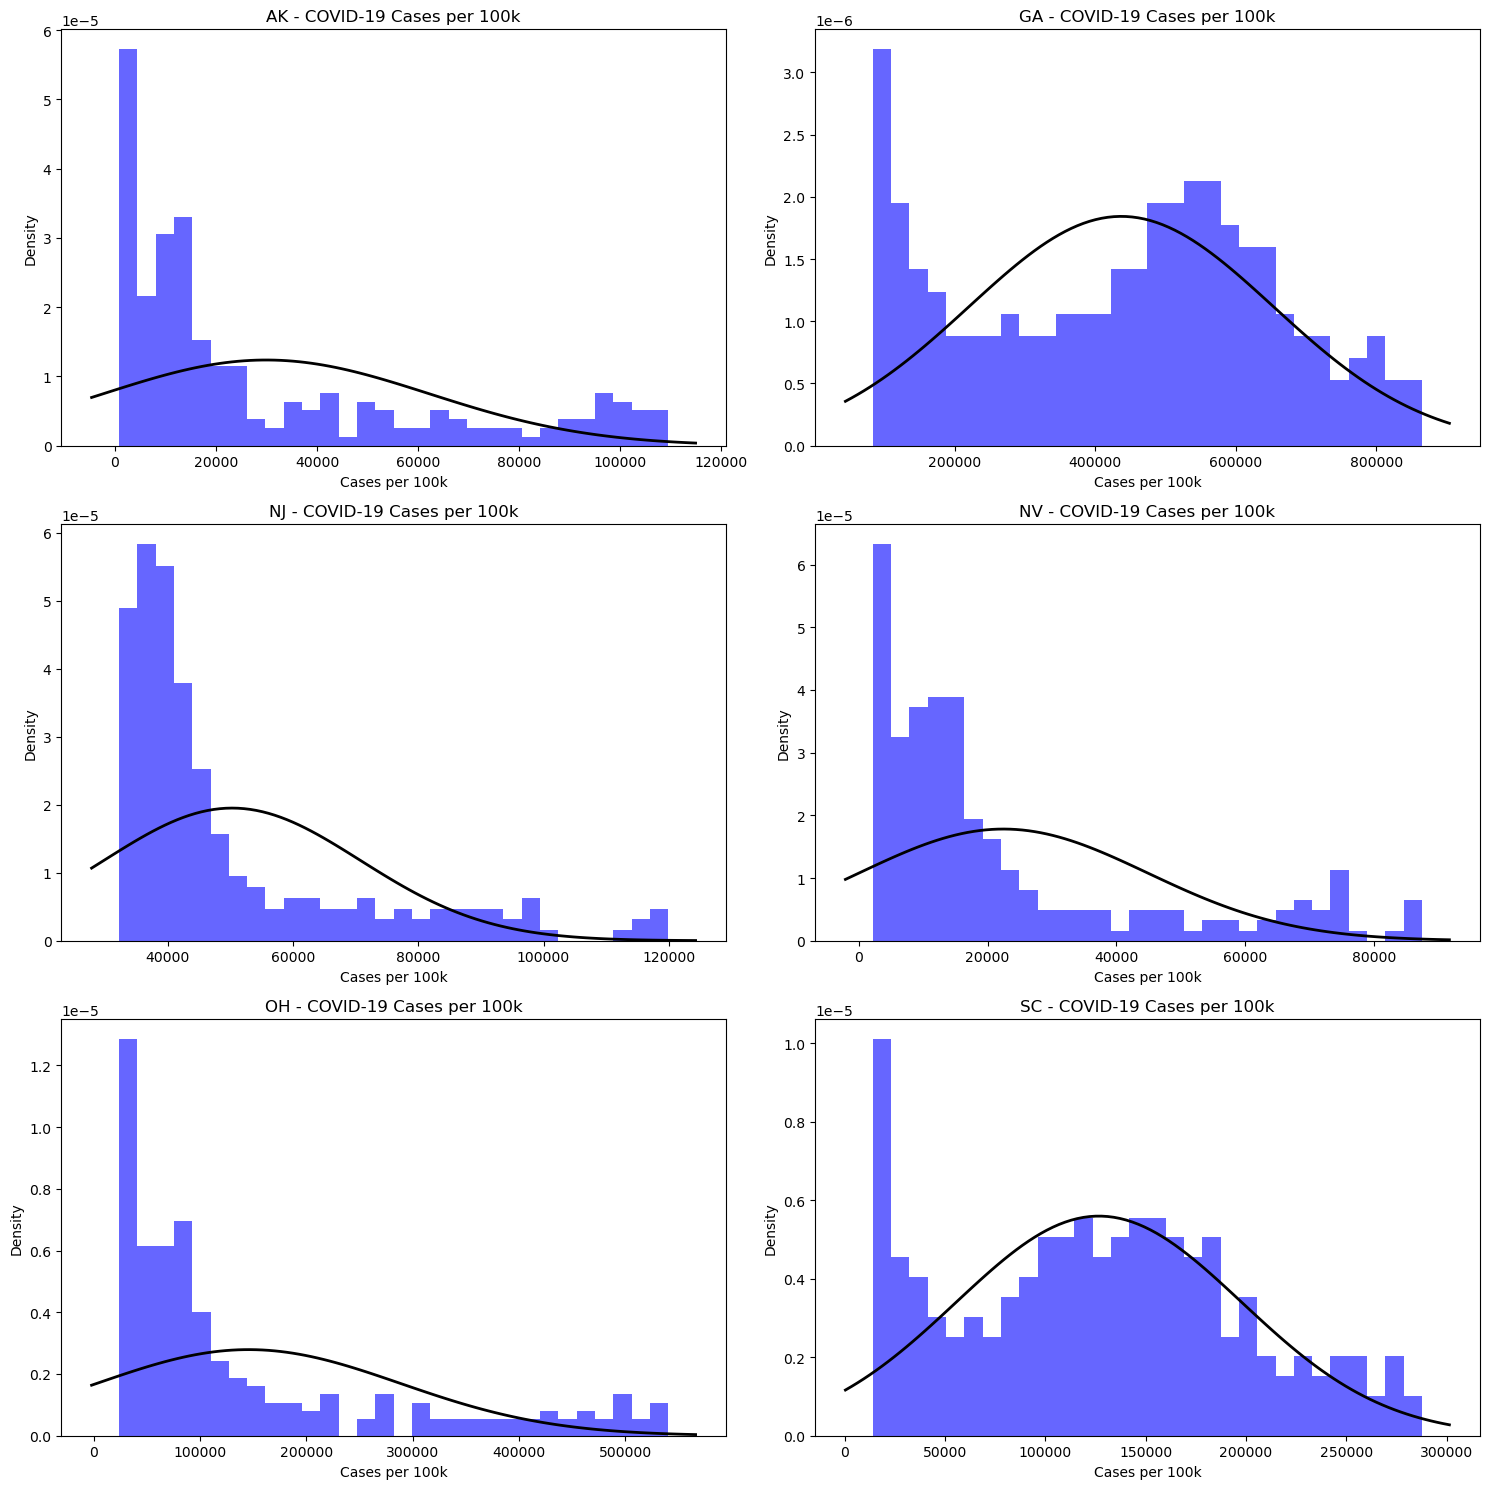


AK Statistics:
Mean: 29952.82
Variance: 1039249047.56
Skewness: 1.17
Kurtosis: 0.03

GA Statistics:
Mean: 437082.11
Variance: 46889139785.57
Skewness: -0.09
Kurtosis: -1.06

NJ Statistics:
Mean: 50279.88
Variance: 417901799.53
Skewness: 1.66
Kurtosis: 1.94

NV Statistics:
Mean: 22449.20
Variance: 501361452.59
Skewness: 1.44
Kurtosis: 0.93

OH Statistics:
Mean: 145536.29
Variance: 20443952836.87
Skewness: 1.42
Kurtosis: 0.77

SC Statistics:
Mean: 126691.65
Variance: 5083202123.16
Skewness: 0.17
Kurtosis: -0.78


In [7]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, norm
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'super_covid_states.csv'
covid_data = pd.read_csv(file_path)

# Filter data for the specified states
target_states = ['NJ', 'NV', 'OH', 'SC', 'AK', 'GA']
filtered_data = covid_data[covid_data['State'].isin(target_states)]

# Extract date columns for cases (assumes case columns end with '_cases')
case_columns = [col for col in filtered_data.columns if '_cases' in col]

# Calculate daily cases per 100,000 population for each county
for col in case_columns:
    filtered_data[col + '_per_100k'] = (filtered_data[col] / filtered_data['population']) * 100000

# Aggregate the data by state to get daily cases per 100,000
state_daily_cases = filtered_data.groupby('State')[[col + '_per_100k' for col in case_columns]].sum()

# Initialize dictionary to store statistics for each state
state_stats = {}

# Plot and calculate statistics for each state
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, (state, daily_cases) in enumerate(state_daily_cases.iterrows()):
    # Flatten daily cases to create a single series for the state
    daily_cases_series = daily_cases.values.flatten()
    
    # Calculate statistics
    mean = np.mean(daily_cases_series)
    variance = np.var(daily_cases_series)
    skewness = skew(daily_cases_series)
    kurt = kurtosis(daily_cases_series)
    
    # Save stats to dictionary
    state_stats[state] = {
        'mean': mean,
        'variance': variance,
        'skewness': skewness,
        'kurtosis': kurt
    }
    
    # Plot histogram and fit normal distribution
    axes[i].hist(daily_cases_series, bins=30, density=True, alpha=0.6, color='b')
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, np.sqrt(variance))
    axes[i].plot(x, p, 'k', linewidth=2)
    axes[i].set_title(f"{state} - COVID-19 Cases per 100k")
    axes[i].set_xlabel("Cases per 100k")
    axes[i].set_ylabel("Density")

plt.tight_layout()
plt.show()

# Print statistics for each state
for state, stats in state_stats.items():
    print(f"\n{state} Statistics:")
    for stat_name, value in stats.items():
        print(f"{stat_name.capitalize()}: {value:.2f}")


Poission Distributions

In [6]:
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the CSV file
file_path = 'super_covid_states.csv'
covid_data = pd.read_csv(file_path)

# Extract the necessary columns for processing: state, population, and daily cases/deaths
state_data = covid_data[['State', 'population']]
daily_cases = covid_data.filter(regex='_cases$')
daily_deaths = covid_data.filter(regex='_deaths$')

# Initialize dictionaries to store state-wise rates per 100,000 population
statewise_cases_per_100k = {}
statewise_deaths_per_100k = {}

# Calculate cases and deaths per 100,000 population for each state and store in dictionary
for state in covid_data['State'].unique():
    # Filter data for the specific state
    state_population = covid_data[covid_data['State'] == state]['population']
    state_cases = daily_cases[covid_data['State'] == state].sum()  # Sum across counties
    state_deaths = daily_deaths[covid_data['State'] == state].sum()  # Sum across counties

    # Calculate rates per 100,000 population
    state_cases_per_100k = (state_cases / state_population.sum()) * 100000
    state_deaths_per_100k = (state_deaths / state_population.sum()) * 100000

    # Store the rates in dictionaries
    statewise_cases_per_100k[state] = state_cases_per_100k.mean()
    statewise_deaths_per_100k[state] = state_deaths_per_100k.mean()

# Convert dictionaries to a DataFrame for clearer display
statewise_poisson_data = pd.DataFrame({
    'State': statewise_cases_per_100k.keys(),
    'Average Daily Cases per 100k': statewise_cases_per_100k.values(),
    'Average Daily Deaths per 100k': statewise_deaths_per_100k.values()
})

# Create the 'poisson_graph' directory if it doesn't exist
output_dir = 'poisson_graph'
os.makedirs(output_dir, exist_ok=True)

# Plot and save Poisson distribution fit for each state
for i, row in statewise_poisson_data.iterrows():
    state = row['State']
    avg_cases = row['Average Daily Cases per 100k']
    avg_deaths = row['Average Daily Deaths per 100k']
    
    # Generate Poisson distribution for cases
    cases_x = np.arange(0, int(avg_cases * 2))
    cases_poisson = poisson.pmf(cases_x, avg_cases)
    
    # Generate Poisson distribution for deaths
    deaths_x = np.arange(0, int(avg_deaths * 2))
    deaths_poisson = poisson.pmf(deaths_x, avg_deaths)
    
    # Create the figure for the current state
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot cases with λ in title
    axs[0].bar(cases_x, cases_poisson, color='blue', alpha=0.7)
    axs[0].set_title(f"{state} - Daily Cases per 100k (λ = {avg_cases:.2f})")
    axs[0].set_xlabel("Cases per 100,000")
    axs[0].set_ylabel("Probability")
    
    # Plot deaths with λ in title
    axs[1].bar(deaths_x, deaths_poisson, color='red', alpha=0.7)
    axs[1].set_title(f"{state} - Daily Deaths per 100k (λ = {avg_deaths:.2f})")
    axs[1].set_xlabel("Deaths per 100,000")
    axs[1].set_ylabel("Probability")

    # Save the figure to the output directory
    fig.savefig(os.path.join(output_dir, f"{state}_poisson_model.png"))
    plt.close(fig)  # Close the figure to free memory


In [ ]:
This one is essentially the same but it just prints it onto a folder

In [4]:
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the CSV file
file_path = 'super_covid_states.csv'
covid_data = pd.read_csv(file_path)

# Extract the necessary columns for processing: state, population, and daily cases/deaths
state_data = covid_data[['State', 'population']]
daily_cases = covid_data.filter(regex='_cases$')
daily_deaths = covid_data.filter(regex='_deaths$')

# Initialize dictionaries to store state-wise rates per 100,000 population
statewise_cases_per_100k = {}
statewise_deaths_per_100k = {}

# Calculate cases and deaths per 100,000 population for each state and store in dictionary
for state in covid_data['State'].unique():
    # Filter data for the specific state
    state_population = covid_data[covid_data['State'] == state]['population']
    state_cases = daily_cases[covid_data['State'] == state].sum()  # Sum across counties
    state_deaths = daily_deaths[covid_data['State'] == state].sum()  # Sum across counties

    # Calculate rates per 100,000 population
    state_cases_per_100k = (state_cases / state_population.sum()) * 100000
    state_deaths_per_100k = (state_deaths / state_population.sum()) * 100000

    # Store the rates in dictionaries
    statewise_cases_per_100k[state] = state_cases_per_100k.mean()
    statewise_deaths_per_100k[state] = state_deaths_per_100k.mean()

# Convert dictionaries to a DataFrame for clearer display
statewise_poisson_data = pd.DataFrame({
    'State': statewise_cases_per_100k.keys(),
    'Average Daily Cases per 100k': statewise_cases_per_100k.values(),
    'Average Daily Deaths per 100k': statewise_deaths_per_100k.values()
})

# Create the 'poisson_graph' directory if it doesn't exist
output_dir = 'poisson_graph'
os.makedirs(output_dir, exist_ok=True)

# Plot and save Poisson distribution fit for each state
for i, row in statewise_poisson_data.iterrows():
    state = row['State']
    avg_cases = row['Average Daily Cases per 100k']
    avg_deaths = row['Average Daily Deaths per 100k']
    
    # Generate Poisson distribution for cases
    cases_x = np.arange(0, int(avg_cases * 2))
    cases_poisson = poisson.pmf(cases_x, avg_cases)
    
    # Generate Poisson distribution for deaths
    deaths_x = np.arange(0, int(avg_deaths * 2))
    deaths_poisson = poisson.pmf(deaths_x, avg_deaths)
    
    # Create the figure for the current state
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot cases
    axs[0].bar(cases_x, cases_poisson, color='blue', alpha=0.7)
    axs[0].set_title(f"{state} - Daily COVID-19 Cases per 100k (Poisson Model)")
    axs[0].set_xlabel("Cases per 100,000")
    axs[0].set_ylabel("Probability")
    
    # Plot deaths
    axs[1].bar(deaths_x, deaths_poisson, color='red', alpha=0.7)
    axs[1].set_title(f"{state} - Daily COVID-19 Deaths per 100k (Poisson Model)")
    axs[1].set_xlabel("Deaths per 100,000")
    axs[1].set_ylabel("Probability")

    # Save the figure to the output directory
    fig.savefig(os.path.join(output_dir, f"{state}_poisson_model.png"))
    plt.close(fig)  # Close the figure to free memory


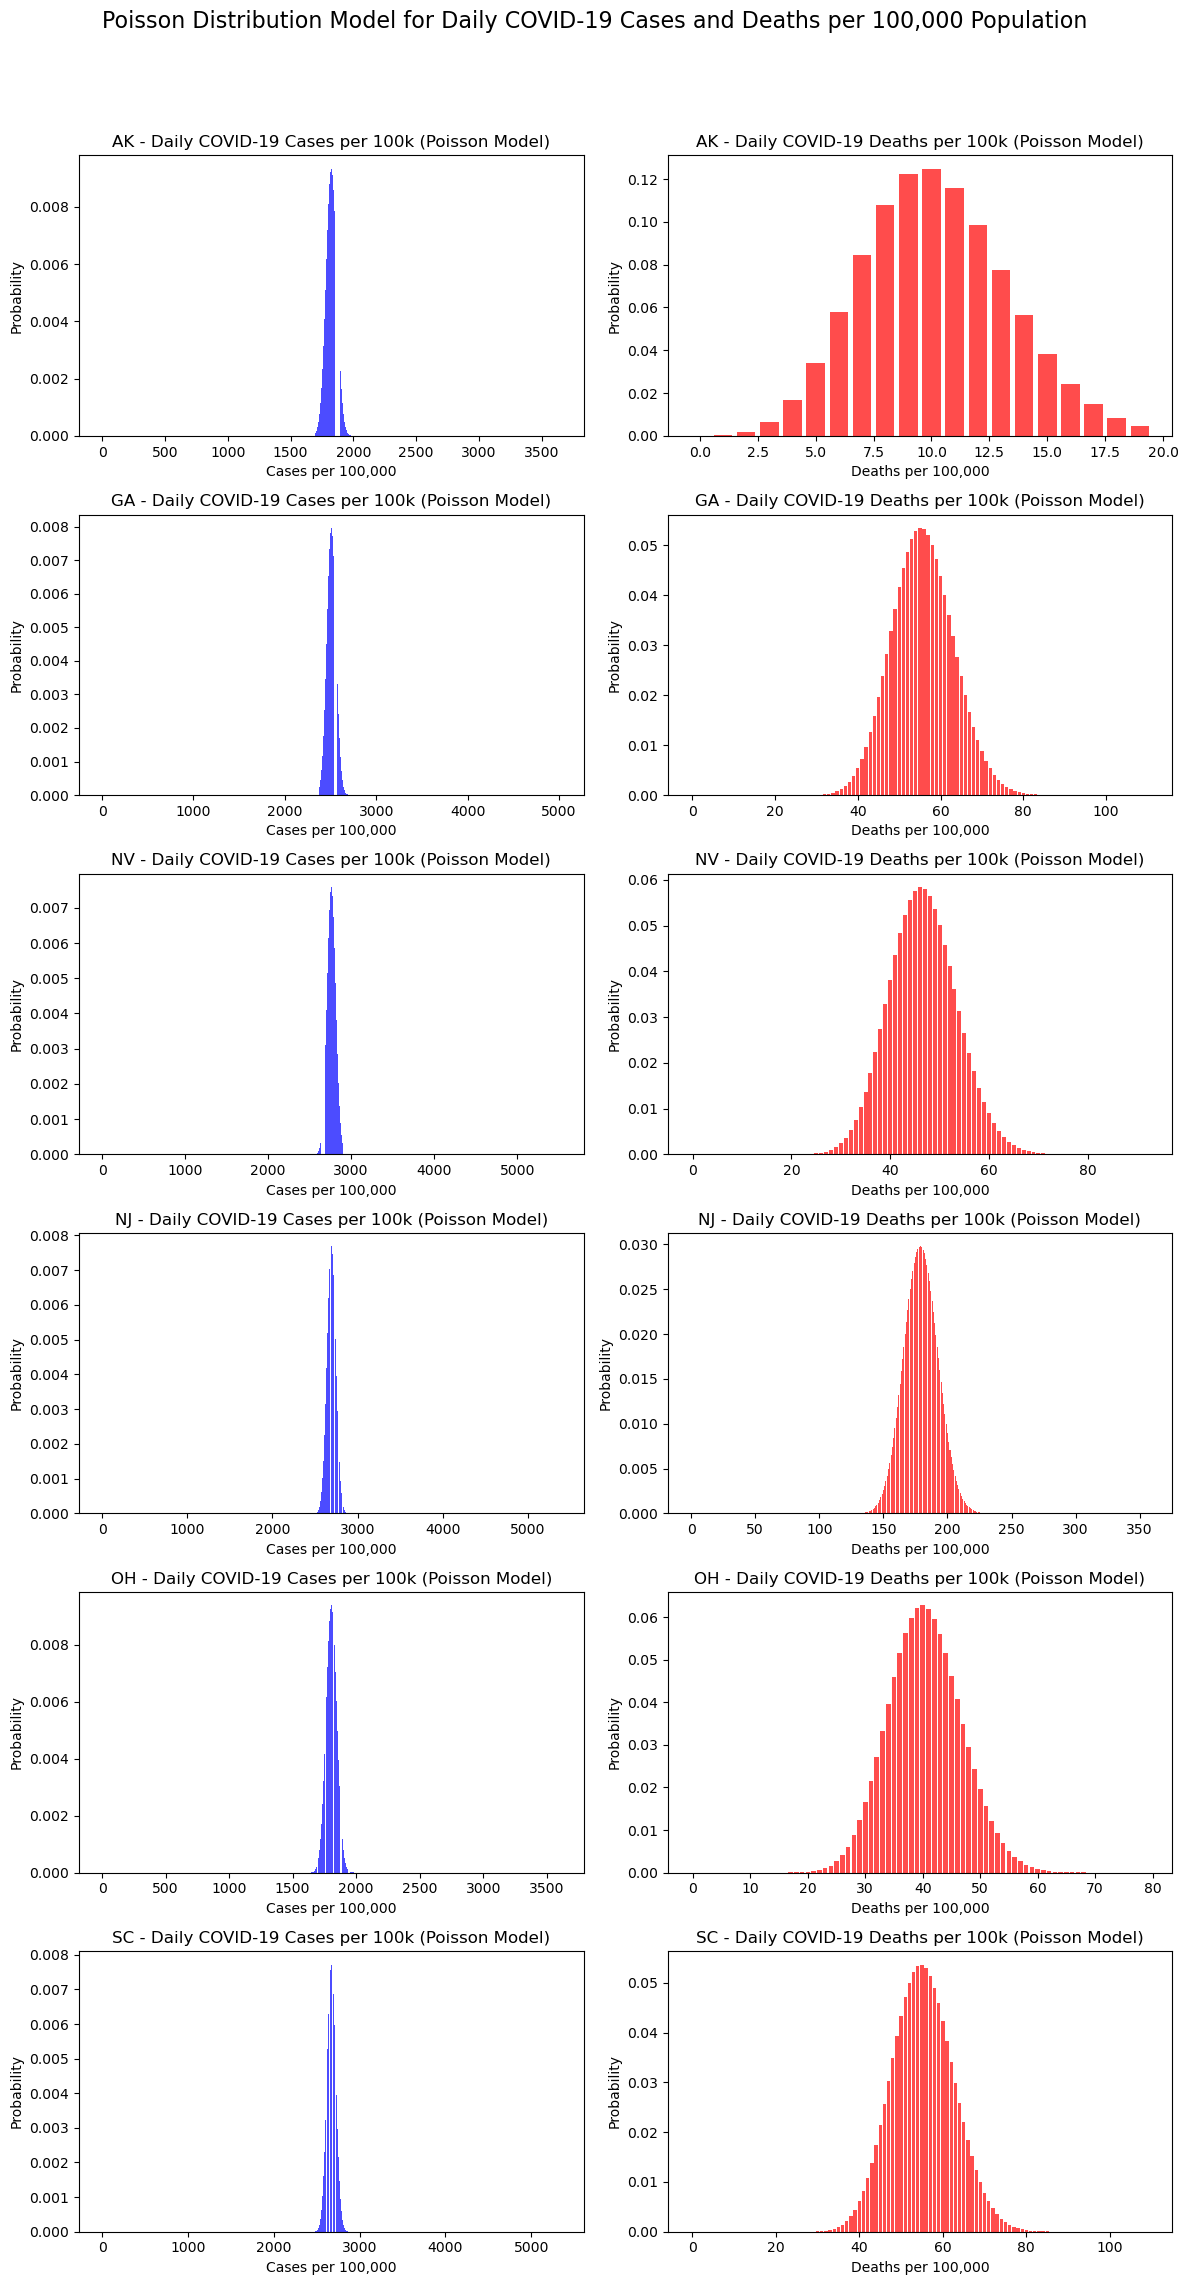

In [1]:
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = 'super_covid_states.csv'
covid_data = pd.read_csv(file_path)

# Extract the necessary columns for processing: state, population, and daily cases/deaths
state_data = covid_data[['State', 'population']]
daily_cases = covid_data.filter(regex='_cases$')
daily_deaths = covid_data.filter(regex='_deaths$')

# Initialize dictionaries to store state-wise rates per 100,000 population
statewise_cases_per_100k = {}
statewise_deaths_per_100k = {}

# Calculate cases and deaths per 100,000 population for each state and store in dictionary
for state in covid_data['State'].unique():
    # Filter data for the specific state
    state_population = covid_data[covid_data['State'] == state]['population']
    state_cases = daily_cases[covid_data['State'] == state].sum()  # Sum across counties
    state_deaths = daily_deaths[covid_data['State'] == state].sum()  # Sum across counties

    # Calculate rates per 100,000 population
    state_cases_per_100k = (state_cases / state_population.sum()) * 100000
    state_deaths_per_100k = (state_deaths / state_population.sum()) * 100000

    # Store the rates in dictionaries
    statewise_cases_per_100k[state] = state_cases_per_100k.mean()
    statewise_deaths_per_100k[state] = state_deaths_per_100k.mean()

# Convert dictionaries to a DataFrame for clearer display
statewise_poisson_data = pd.DataFrame({
    'State': statewise_cases_per_100k.keys(),
    'Average Daily Cases per 100k': statewise_cases_per_100k.values(),
    'Average Daily Deaths per 100k': statewise_deaths_per_100k.values()
})

# Plot Poisson distribution fit for each state
fig, axs = plt.subplots(len(statewise_poisson_data), 2, figsize=(12, len(statewise_poisson_data) * 4))
fig.suptitle("Poisson Distribution Model for Daily COVID-19 Cases and Deaths per 100,000 Population", fontsize=16)

# Loop through each state and create Poisson distribution plot for cases and deaths
for i, row in statewise_poisson_data.iterrows():
    state = row['State']
    avg_cases = row['Average Daily Cases per 100k']
    avg_deaths = row['Average Daily Deaths per 100k']
    
    # Generate Poisson distribution for cases
    cases_x = np.arange(0, int(avg_cases * 2))
    cases_poisson = poisson.pmf(cases_x, avg_cases)
    
    # Generate Poisson distribution for deaths
    deaths_x = np.arange(0, int(avg_deaths * 2))
    deaths_poisson = poisson.pmf(deaths_x, avg_deaths)
    
    # Plot cases
    axs[i, 0].bar(cases_x, cases_poisson, color='blue', alpha=0.7)
    axs[i, 0].set_title(f"{state} - Daily COVID-19 Cases per 100k (Poisson Model)")
    axs[i, 0].set_xlabel("Cases per 100,000")
    axs[i, 0].set_ylabel("Probability")
    
    # Plot deaths
    axs[i, 1].bar(deaths_x, deaths_poisson, color='red', alpha=0.7)
    axs[i, 1].set_title(f"{state} - Daily COVID-19 Deaths per 100k (Poisson Model)")
    axs[i, 1].set_xlabel("Deaths per 100,000")
    axs[i, 1].set_ylabel("Probability")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
